<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/Semana13/PoissonHipotesisFalsearH1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

from scipy import integrate
from scipy.stats import poisson
from scipy.special import factorial

In [96]:
def Likelihood(mu,n,b,s):

  l = s+mu*b

  return np.exp(-l)*l**n/factorial(n)

In [141]:
n = np.array([3])
b = np.array([3])
s = np.array([0])

#n = np.array([3,3])
#b = np.array([3,3])
#s = np.array([0,0])

In [142]:
def JointLikelihood(mu,n,b,s):

  Joint = 1.

  for i in range(len(n)):
    Joint *= Likelihood(mu,n[i],b[i],s[i])

  return Joint

In [143]:
mu = np.linspace(0,5,100)
JointLike = JointLikelihood(mu,n,b,s)

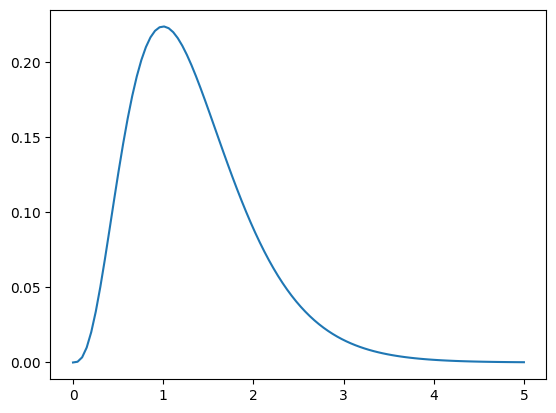

In [144]:
plt.plot(mu,JointLike)

In [145]:
probx = integrate.quad(JointLikelihood,0,np.inf,args=(n,b,s))[0]
probx

0.3333333333333333

In [146]:
Posterior = JointLikelihood(mu,n,b,s)/probx

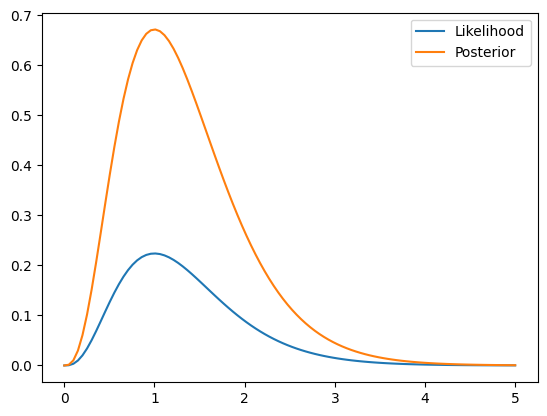

In [147]:
plt.plot(mu,JointLike,label='Likelihood')
plt.plot(mu,Posterior,label='Posterior')
plt.legend()

In [148]:
# Haga una prueba de 2 colas para mirar que modelos quedan excluidos a 95% CL
# Entonces buscamos los percentiles de la posterior para los cuales el área bajo la curva es 2.5 por ambos lados

In [149]:
deltamu = 0.01
mup = 0.

found1 = False
found2 = False

for i in range(500):
  I1 = integrate.quad(JointLikelihood,0,mup,args=(n,b,s))[0]/probx
  I2 = integrate.quad(JointLikelihood,mup,np.inf,args=(n,b,s))[0]/probx
  #print(I1,I2,mup)
  mup += deltamu
  if I1 > 0.025 and not found1:
    Left = mup - deltamu
    found1 = True
  elif I2 < 0.025 and not found2:
    Right = mup - deltamu
    found2 = True

print(Left,Right)

0.37000000000000016 2.9299999999999815


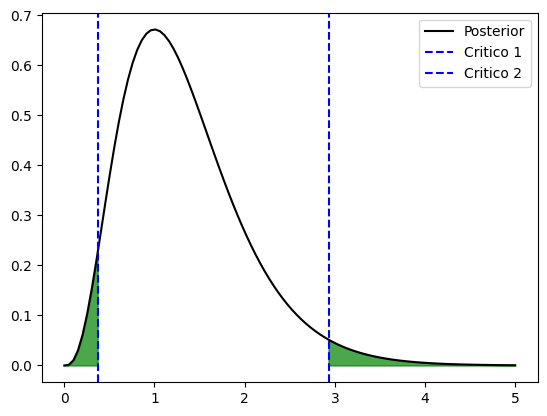

In [150]:
plt.plot(mu,Posterior,color='k',label='Posterior')
plt.axvline(x=Left,color='b',linestyle='--',label='Critico 1')
plt.axvline(x=Right,color='b',linestyle='--',label='Critico 2')
x1 = np.linspace(0,Left,100)
x2 = np.linspace(Right,5,100)
plt.fill_between(x1,0,JointLikelihood(x1,n,b,s)/probx,color='g',alpha=0.7)
plt.fill_between(x2,0,JointLikelihood(x2,n,b,s)/probx,color='g',alpha=0.7)
plt.legend()

In [154]:
# Todos los modelos que predigan menos eventos de ----- están excluidos
Left*b

array([1.11])

In [155]:
# Todos los modelos que predigan más eventos de ------- están excluidos
Right*b

array([8.79])